# 2020 annual CDC survey data of 400k adults related to their health status

## What topic does the dataset cover?

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
%matplotlib inline

In [3]:
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
sns.set_style("darkgrid", {"grid.color": ".6"})

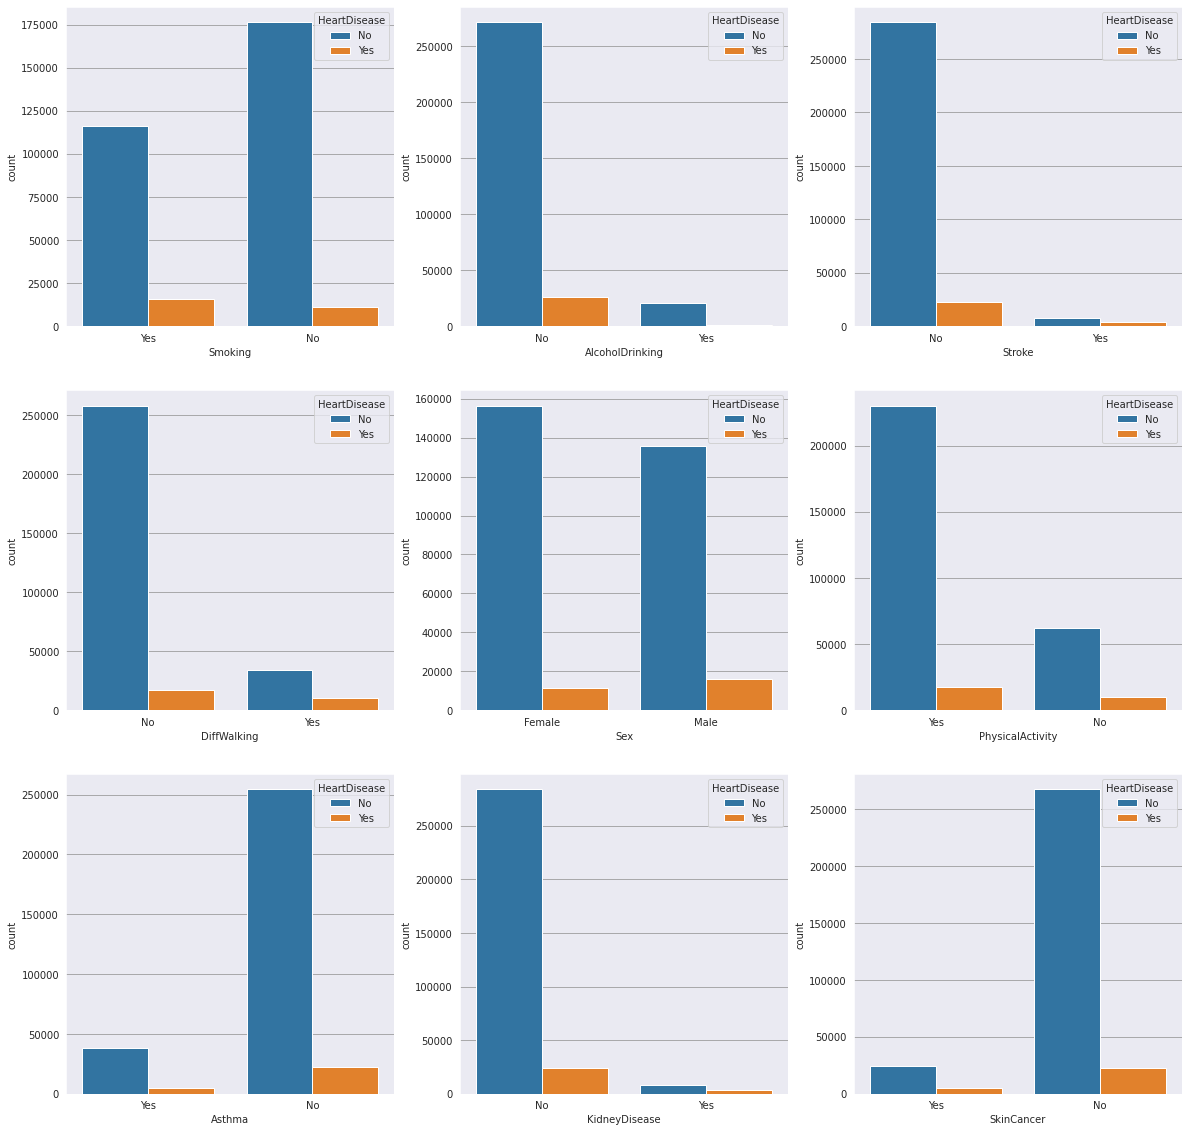

In [5]:
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    row=0
    col=0
    for row in range(3):
        for col in range(3):
            column = colRange[row][col]
            sns.countplot(ax=axes[row,col],x=df[column],hue=df['HeartDisease'])
printCount(colRange)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Race', ylabel='count'>

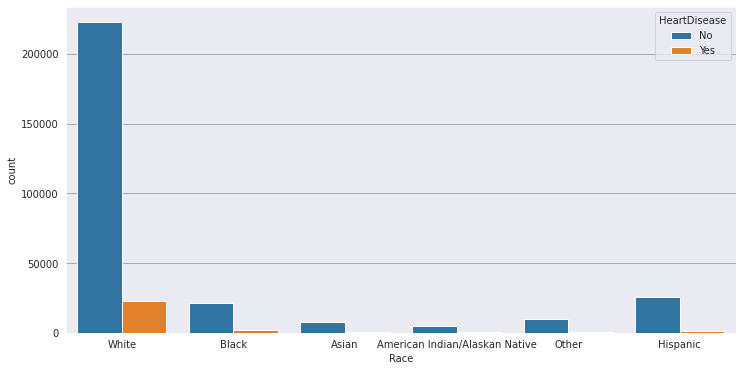

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(df['Race'],hue=df['HeartDisease'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

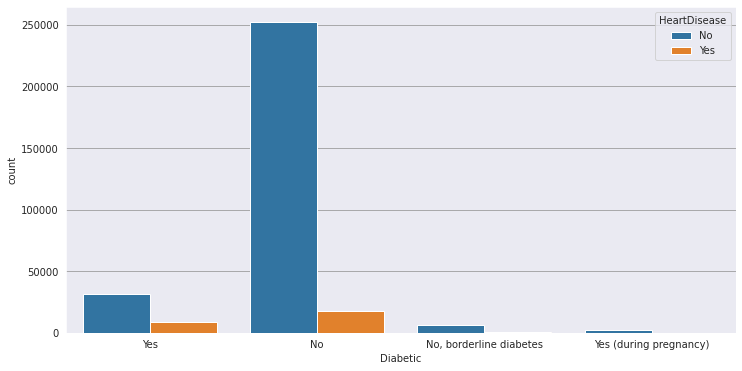

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(df['Diabetic'],hue=df['HeartDisease'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

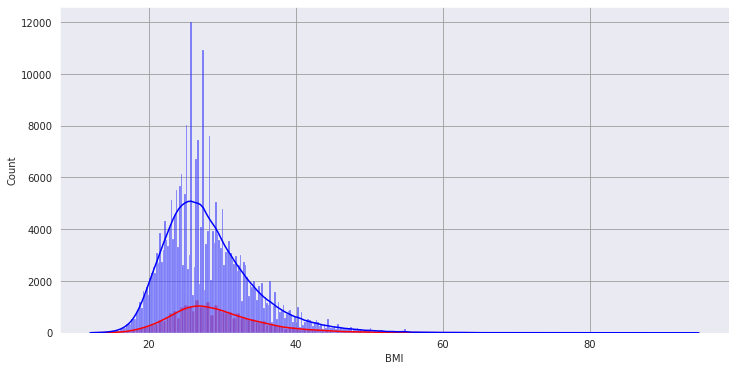

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

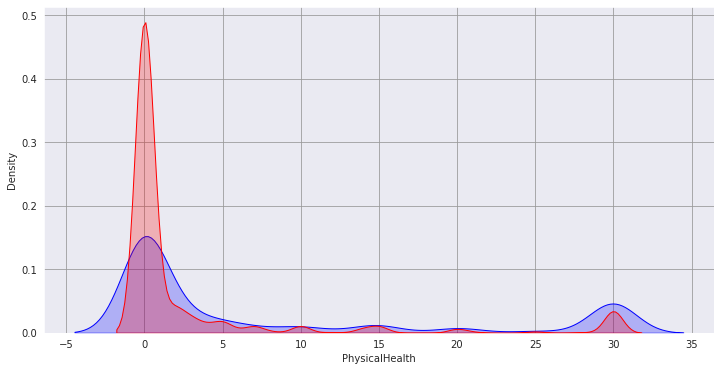

In [9]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='blue')
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='red')

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

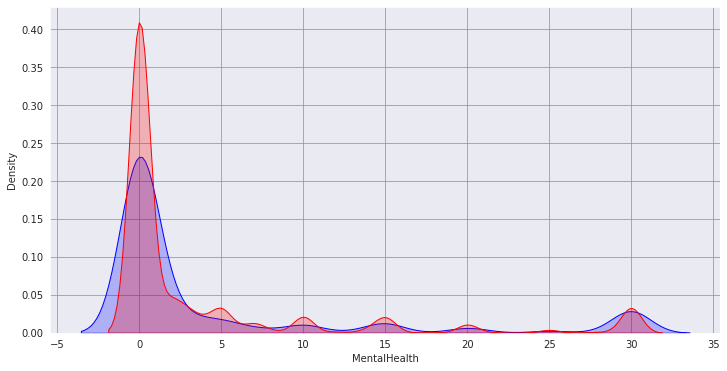

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['HeartDisease']=='Yes']['MentalHealth'],shade=True,color='blue')
sns.kdeplot(df[df['HeartDisease']=='No']['MentalHealth'],shade=True,color='red')

<AxesSubplot:>

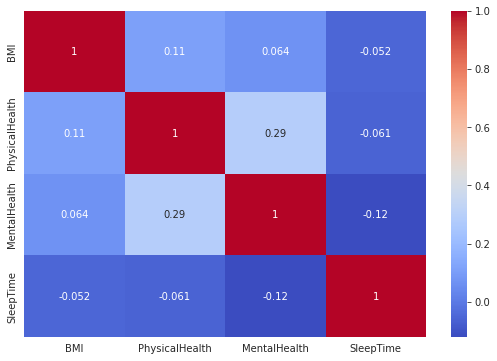

In [11]:
import matplotlib
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [13]:
print(df['Smoking'].unique())
print(df['AlcoholDrinking'].unique())
print(df['Stroke'].unique())
print(df['DiffWalking'].unique())
print(df['Sex'].unique())
print(df['AgeCategory'].unique())
print(df['Race'].unique())
print(df['Diabetic'].unique())
print(df['PhysicalActivity'].unique())
print(df['GenHealth'].unique())
print(df['Asthma'].unique())
print(df['KidneyDisease'].unique())
print(df['SkinCancer'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [14]:
def change(col):
    if col=='Yes':
        return 1
    elif col=='No':
        return 0
df['Smoking'] = df['Smoking'].apply(change)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(change)
df['Stroke'] = df['Stroke'].apply(change)
df['DiffWalking'] = df['DiffWalking'].apply(change)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(change)
df['Asthma'] = df['Asthma'].apply(change)
df['KidneyDisease'] = df['KidneyDisease'].apply(change)
df['SkinCancer'] = df['SkinCancer'].apply(change)
df['HeartDisease'] = df['HeartDisease'].apply(change)

In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [16]:
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
